### Univariate Analysis

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Univariate Analysis** including:

* Histograms
* Probability Density Functions
* Cumulative Distribution Functions 

**YouTube Lecture**: check out my lecture on [Univariate Distributions](https://youtu.be/TbqaMXdSV4I?si=tzPNssh5Qcqv6DY_). For your convenience here's a summary of salient points.

#### Motivation for Univariate Analysis

There are many reasons to include univariate analysis in an e-book on machine learning:

* univariate statistics are used to train, tune and predict with machine learning models, e.g., decision tree predictions for regression is average of the training data in the leaf node, classification decision trees predict with the mode of the training data in the leaf node, models are routinely trained to minimize the mean of the square error, 

* histograms, probability density functions and cumulative distribution functions are applied in machine learning workflows, e.g., to evaluate overlap in feature values between cluster groups, to check for bias in predictive model error distributions, etc.

* univariate analysis is a prerequisite for the bivariate and multivariate analyses that are critical for feature selection, model calculation and model checking

* also, this privides us with more important tools for plotting and checking our steps in our workflows. In practice, I always plot and check the univariate distributions or atleast check the mean of the predictions for unbiasedness.

#### Univariate, Bivariate and Multivariate

Let's start with some basic definitions with respect to univariate, bivariate and multivariate.

* **Univariate** - involving one variable (feature) or event.

* **Univariate Statistics** - summary measures based on one feature measured over the samples

* **Univariate Parameters** - summary measures inferred for one feature measured over the population

We start with univariate, but we will cover bivariate, involving two variables (features) later. Note, joint probabilities and distributions are: 

* **Bivariate** - regarding 2 variables (features)

* **Multivariate** - the general term for $> 1$ features, but often refers to $\ge 3$ or more).

* **Massively Multivariate** - high dimensional, usually indicating 7 or more features

Now, let's describe the concept of a distribution. 

* **Statistical Distribution** – for a variable (feature) a description of the probability of occurrence over the range of possible values. What do we get from a statistical distribution?

    * what is the minimum and maximum?

    * do we have a lot of low values?

    * do we have a lot of high values?

    * do we have outliers (values that don’t make sense and need an explanation)?

#### Histograms

A histogram is a bar plot of frequency over an exhaustive set of bins or categories. A histogram is calculated with the following steps:

1. Divide the continuous feature  range of possible values into 𝐾 equal size bins, ∆𝑥, or categories,

$$
\Delta x = \left( \frac{X_{max}-x_{min}}{K} \right)
$$

2. Count the number of samples (frequency) in each bin, $𝑛_(𝑘),\forall 𝑘=1,\ldots,𝐾$. 

3. Plot bin probability versus mid‐range ($\left( 𝑥_{𝑘,𝑚𝑖𝑛} + \frac{\Delta x}{2} \right)$ if continuous or the categorical label).

#### Normalized Histogram

For a normalized histogram, the frequencies are normalized to become the probability that the outcome existing within each bin, 𝑘.

$$
𝑝_𝑘 = \frac{𝑛_𝑘}{𝑛}, \quad \forall \quad 𝑘=1,\ldots,𝐾
$$

now for each bin we have probability:

$$
0.0 \le 𝑝_𝑘 \le 1.0, \quad \forall \quad 𝑘=1,\dots,𝐾
$$

closure, sum of all bins is one: 

$$
\sum^{K}_{k=1} p_k = 1
$$

Normalized histogram is convenient because we can read probability from the plot. The steps to calculate a normalized histogram are:

1. Divide data range ($x_{max} ‐ x_{min}$) into desired number bins / classes / categories, $K$, for continuous features:

$$
\Delta x = \left( \frac{X_{max}-x_{min}}{K} \right)
$$

2. Count the number of data in bin, $n_k$ and then compute the probability where $n$ is the total number of data.: 

$$
𝑝_𝑘 = \frac{𝑛_𝑘}{𝑛}, \quad \forall \quad 𝑘=1,\ldots,𝐾
$$

3. Plot bin probability versus mid‐range ($\left( 𝑥_{𝑘,𝑚𝑖𝑛} + \frac{\Delta x}{2} \right)$ if continuous or the categorical label).

#### Histogram Bin Size

What is the impact of bin size?

* **too large bins / too few bins** - often smooth out, mask information lack resolution

* **too small bins / too many bins** - are too noisy lack samples in each bin for stable assessment of frequency or probability (if normalized histogram)

The general guidance is to choose the highest resolution with lowest possible noise.

Note: very large and very small bins will tend towards equal proportion in each bin (all samples in a single bin or one sample in each bin). 
this will appear as a uniform distribution.

#### Probability Density Function (PDF)

A function, $𝑓_x(𝑥)$, of probability density across the range of all possible feature values, $𝑥$, with the following constraints:

* non-negativity, note for continuous variables (features) density may be $> 1.0$

$$
0.0 \le f_x(x)
$$

* integrate to calculate probability

$$
0 \le \int^b_a f_x(𝑥)𝑑𝑥 = 𝑃(𝑎 \le 𝑥 \le 𝑏) \le 1.0
$$

* closure:

$$
\int^{\infty}_{-\infty} f_x(x)dx = 1.0
$$

For categorical features, the normalized histogram is the PDF.

Some comments on working with and interpreting the density measure from a probability density function, $𝒇_x(𝒙)$.

1. **Closure** - the area under the curve of a PDF is $= 1.0$.

$$
\int^{\infty}_{-\infty} f_x(x)dx = 1.0
$$

2. **Density** - is a measure of relative likelihood, may be $\gt 1.0$, but cannot be negative!

$$
f_x(x) \ge 0.0
$$

3. **Probability** - is only available from the PDF by integration over an interval.

$$
P(a \le x \le b) = \int^b_a f_x(x) dx
$$

##### Calculating a PDF

For parametric cases the PDF’s equation is known, but for the nonparametric case, the PDF is calculated from the data.

While a data-derived, nonparametric PDF could be calculated by differentiating a data-derived CDF (discussed next), generally this would be too noisy! 

The common method to calculate a data-derived PDF is to fit a smooth model to the data. Kernel Density Estimation (KDE) Approach, fit smooth PDF to data:

1. Replace all data with a kernel, Gaussian is typical.

2. Standardize result to ensure closure, $\int^{\infty}_{-\infty} f_x(x)dx = 1.0$

What is the impact of changing the kernel width? 

* analogous to changing the histogram bin size, attempt to smooth out noise while not removing information

#### Cumulative Distribution Function (CDF)

The cumulative distribution function (CDF) is the sum of a discrete PDF or the integral of a continuous PDF. 

* the cumulative distribution function $𝑭_𝒙 (𝒙)$ is the probability that a random sample, $𝑿$, is less than or equal to a value $𝒙$.

$$
F_x (x) = P(X \le x) = \int^x_{-\infty} f(u) du
$$

* CDF is represented as a plot where the x axis is variable (feature) value and the y axis is cumulative probability.

* for CDF there is no bin assumption; therefore, graph is at the resolution of the data.

* monotonically non-decreasing function, because a negative slope would indicate negative probability over an interval.

Some comments on working with and interpreting the density measure from a cumulative distribution function, $F_x(𝒙)$.

To check for a valid CDF given these constraints:

* non-negativity constraint

$$
F_x(x) = P(X \le x) \ge 0.0, \quad \forall \quad x
$$

valid probability:

$$
0.0 \le F_x(x) \le 1.0, \quad \forall \quad x
$$

* cannot have negative slope

$$
\frac{dF_x(x)}{dx} \ge 0.0, \quad \forall \quad x
$$

* minimum and maximum (closure) values:

$$
min(F_x(x)) = 0.0 \quad \quad max(F_x(x)) = 1.0
$$

* since the CDF does not have a negative slope we can use limits:

$$
\lim\limits_{x \to -\infty} F_x(x) \rightarrow 0.0 \quad \quad \lim\limits_{x \to \infty} F_x(x) \rightarrow 1.0
$$

#### Random Variable 

Now it is time to introduce the concept of the random variable, since we need this to understand CDF notation above.

* **Random Variable** - we do not know the value at a location / time, it can take on a range of possible values, fully described with a statistical distribution PDF / CDF. It is represented as an upper-case variable, e.g., $𝑿$, while possible outcomes or data measures are represented with lower case, e.g., $𝒙$.
more latter on this!

#### Load the Required Libraries

The following code loads the required libraries.

In [3]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [5]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                       # summary statistics
import seaborn as sns                                         # advanced plotting
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
from IPython.utils import io                                  # mute output from simulation
cmap = plt.cm.inferno                                         # color map

#### Define Functions

This is a convenience function to add major and minor gridlines to improve plot interpretability.

In [7]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [9]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  For fun try misspelling the name. You will get an ugly, long error.  

In [11]:
df = pd.read_csv('sample_data_cow.csv')                       # load our data table (wrong name!)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data_cow.csv'

That's Python, but there's method to the madness. In general the error shows a trace from the initial command into all the nested programs involved until the actual error occurred. If you are debugging code (I know, I'm getting ahead of myself now), this is valuable for the detective work of figuring out what went wrong. I've spent days in C++ debugging one issue, this helps. So since you're working in Jupyter Notebook, the program just assumes you code. Fine. If you scroll to the bottom of the error you often get a summary statement *FileNotFoundError: File b'sample_data_cow.csv' does not exist*. Ok, now you know that you don't have a file with that name in the working directory.  

Painful to leave that error in our workflow, eh? Every time I pass it while making this documented I wanted to fix it. Its a coder thing... While we are at it, notice if you click the '+' you can add in a new block anywhere. Ok, let's spell the file name correctly and get back to work.

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data.csv') # load data from Dr. Pyrcz's github repository

No error now! It worked, we loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame is always a good idea as a first order check. 

#### Visualizing the DataFrame

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [32]:
print(df.iloc[0:5,:])                                         # display first 4 samples in the table as a preview
df.head(n=13)                                                 # we could also use this command for a table preview

       X      Y  Facies  Porosity       Perm           AI
0  100.0  900.0     1.0  0.100187   1.363890  5110.699751
1  100.0  800.0     0.0  0.107947  12.576845  4671.458560
2  100.0  700.0     0.0  0.085357   5.984520  6127.548006
3  100.0  600.0     0.0  0.108460   2.446678  5201.637996
4  100.0  500.0     0.0  0.102468   1.952264  3835.270322


,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322
5,100.0,400.0,0.0,0.110579,3.691908,5295.267191
6,100.0,300.0,0.0,0.088936,1.073582,6744.996106
7,100.0,200.0,0.0,0.102094,2.396189,5947.338115
8,100.0,100.0,1.0,0.137453,5.727603,5823.241783
9,200.0,900.0,1.0,0.137062,14.771314,5621.146994


#### Summary Univariate Statistics for Tabular Data

The table includes X and Y coordinates (meters), Facies 1 and 2 (1 is sandstone and 0 interbedded sand and mudstone), Porosity (fraction), permeability as Perm (mDarcy) and acoustic impedance as AI (kg/m2s*10^6). 

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [35]:
df.describe()                                                 # summary statistics

,X,Y,Facies,Porosity,Perm,AI
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,629.823755,488.344828,0.620690,0.150357,183.711554,4203.657220
std,341.200403,166.669352,0.486148,0.049783,344.959449,1317.753146
min,40.000000,29.000000,0.000000,0.058871,0.033611,1844.166880
25%,241.000000,416.000000,0.000000,0.104893,2.186525,2947.867713
50%,700.000000,479.000000,1.000000,0.137062,19.977020,4204.150893
75%,955.000000,539.000000,1.000000,0.199108,246.215865,5397.400218
max,1005.000000,989.000000,1.000000,0.242298,2642.999829,7881.898531


We can also use a wide variety of statistical summaries built into NumPy's ndarrays.  When we use the command:
```p
df['Porosity']                       # returns an Pandas series
df['Porosity'].values                # returns an ndarray
```
Panda's DataFrame returns all the porosity data as a series and if we add 'values' it returns a NumPy ndarray and we have access to a lot of NumPy methods. I also like to use the round function to round the answer to a limited number of digits for accurate reporting of precision and ease of reading.

For example, now we could use commands. like this one:

In [38]:
print('The minimum is ' + str(round((df['Porosity'].values).min(),2)) + '.') # print univariate statistics
print('The maximum is ' + str(round((df['Porosity'].values).max(),2)) + '.')
print('The mean is ' + str(round((df['Porosity'].values).mean(),2)) + '.')
print('The standard deviation is ' + str(round((df['Porosity'].values).std(),2)) + '.')

The minimum is 0.06.
The maximum is 0.24.
The mean is 0.15.
The standard deviation is 0.05.


Here's some of the NumPy statistical functions that take ndarrays as an inputs.  With these methods if you had a multidimensional array you could calculate the average by row (axis = 1) or by column (axis = 0) or over the entire array (no axis specified). We just have a 1D ndarray so this is not applicable here.

We calculate the inverse of the CDF, $F^{-1}_x(x)$ with Numpy percentile function.

In [41]:
print('The minimum is ' + str(round(np.amin(df['Porosity'].values),2))) # print univariate statistics
print('The maximum is ' + str(round(np.amax(df['Porosity'].values),2)))
print('The range (maximum - minimum) is ' + str(round(np.ptp(df['Porosity'].values),2)))
print('The P10 is ' + str(round(np.percentile(df['Porosity'].values,10),3)))
print('The P50 is ' + str(round(np.percentile(df['Porosity'].values,50),3)))
print('The P90 is ' + str(round(np.percentile(df['Porosity'].values,90),3)))
print('The P13 is ' + str(round(np.percentile(df['Porosity'].values,13),3)))
print('The median (P50) is ' + str(round(np.median(df['Porosity'].values),3)))
print('The mean is ' + str(round(np.mean(df['Porosity'].values),3)))

The minimum is 0.06
The maximum is 0.24
The range (maximum - minimum) is 0.18
The P10 is 0.092
The P50 is 0.137
The P90 is 0.212
The P13 is 0.095
The median (P50) is 0.137
The mean is 0.15


We can calculate the CDF value, $F_x(x)$, directly from the data.
* we apply a conditional statement to our ndarray to caculate a boolean ndarray with the same size of the data and then count the cases that meet the condition
* note, we are assuming equal weighting

In [44]:
value = 0.10                                                  # calculate cumulative distribution function for a specified value
cumul_prob = np.count_nonzero(df['Porosity'].values <= value)/len(df)
print('The cumulative probability for porosity = ' + str(value) + ' is ' + str(round(cumul_prob,2)))

The cumulative probability for porosity = 0.1 is 0.18


#### Weighted Univariate Statistics

In the declustering chapters I present methods to calculate weights and the motivation for weighted statistics. 
* The NumPy command average allows for weighted averages as in the case of statistical expectation and declustered statistics.
* For demonstration, lets make a weighting array and apply it.

In [47]:
nd = len(df)                                                  # get the number of data values
wts = np.ones(nd)                                             # make an array of nd length of 1's
print('The equal weighted average is ' + str(round(np.average(df['Porosity'].values,weights = wts),3)) + ', the same as the mean above.')            

The equal weighted average is 0.15, the same as the mean above.


Let's get fancy, we will modify the weights to be 0.5 if the porosity is greater than 13% and retain 1.0 if the porosity is less than or equal to 13%. The results should be a lower weighted average.  

In [50]:
porosity = df['Porosity'].values     
wts[porosity > 0.13] *= 0.1                                   # make arbitrary weights for demonstration
print('The equal weighted average is ' + str(round(np.average(df['Porosity'].values,weights = wts),3)) + ', lower than the equal weighted average above.')

The equal weighted average is 0.112, lower than the equal weighted average above.


I should note that SciPy stats functions provide a handy summary statistics function. The output is a 'list' of values (actually it is a SciPy.DescribeResult object). One can extract any one of them to use in a workflow as follows.

In [53]:
print(stats.describe(df['Porosity'].values))                  # summary statistics
por_stats = stats.describe(df['Porosity'].values)             # store as an array
print('Porosity kurtosis is ' + str(round(por_stats[5],2)))   # extract a statistic 

DescribeResult(nobs=261, minmax=(0.0588710426408954, 0.2422978845362023), mean=0.15035706160196555, variance=0.0024783238419715933, skewness=0.08071652694567066, kurtosis=-1.5618166076333853)
Porosity kurtosis is -1.56


#### Histograms

Let's display some histograms. I reimplemented the hist function from GSLIB. Preview the parameters by typing the command without parameters.
* also to learn about function parameters the alt-tab key combination with cursor in the function parentheses is often available to access the "docstrings" or check the Python package docs.

In [56]:
GSLIB.hist

<function geostatspy.GSLIB.hist(array, xmin, xmax, log, cumul, bins, weights, xlabel, title, fig_name)>

Let's make a histogram for the porosity feature.

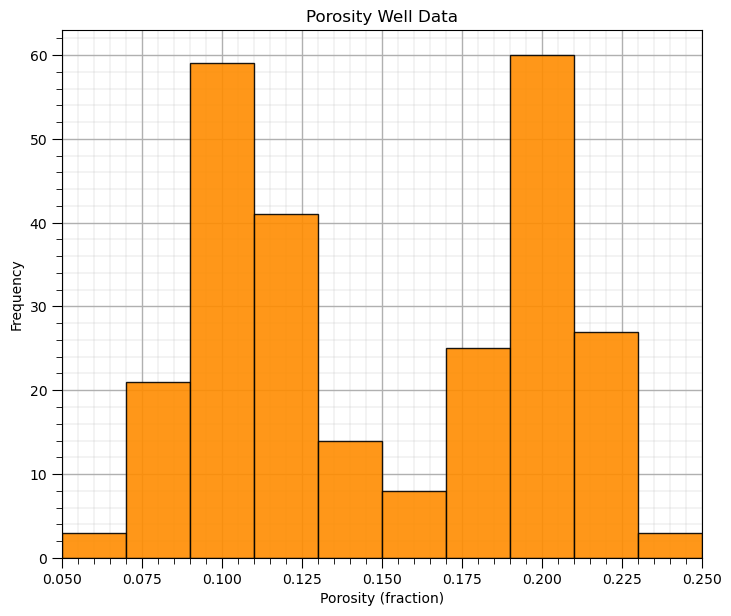

In [59]:
pormin = 0.05; pormax = 0.25                                  # minimum and maximum feature values
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=10,weights = None,
           xlabel='Porosity (fraction)',title='Porosity Well Data')
add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.1, hspace=0.2); plt.show()

What's going on here? Looks quite bimodal. 

#### Histogram Bins, Number of Bins and Bin Size

Let's explore with a few bins sizes to check the impact on the histogram.

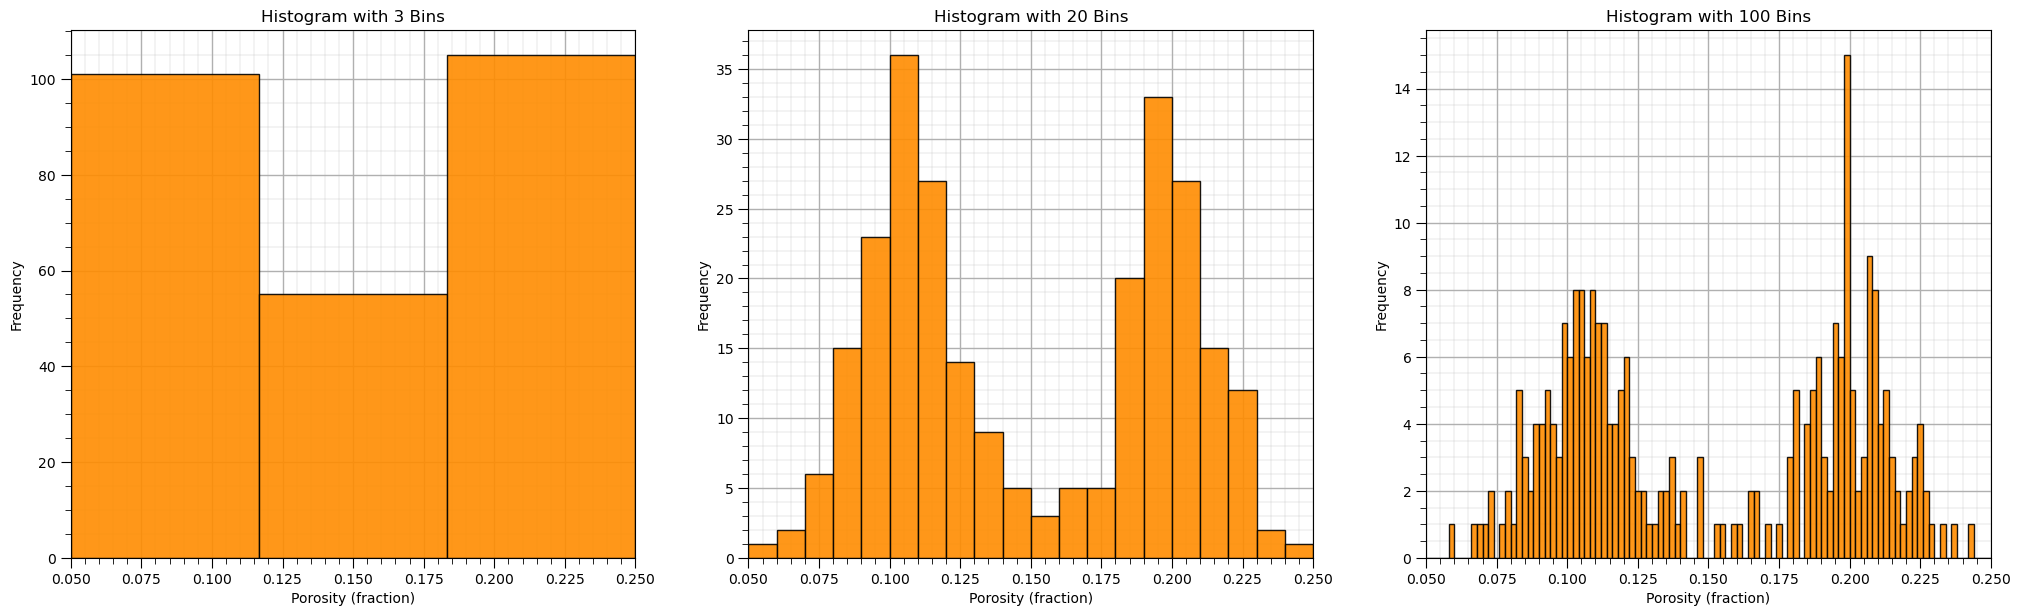

In [62]:
nbin_list = [3,20,100]                                             # number of bins for each histogram

for i,nbin in enumerate(nbin_list):
    plt.subplot(1,3,i+1)
    GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=nbin,weights = None,
                  xlabel='Porosity (fraction)',title='Histogram with ' + str(nbin) + ' Bins'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

See what happens when we use:

* **too large bins / too few bins** - often smooth out, removes information
* **too small bins / too many bins** - often too noisy, obscures information  

#### Plotting a Histogram with the matplotlib Package

I don't want to suggest that matplotlib is hard to use. The GSLIB visualizations provide convenience and once again use the same parameters as the GSLIB methods. Particularly, the 'hist' function is pretty easy to use, just a lot more code to write.  

* here's how we can make the same histogram as above with matplotlib directly

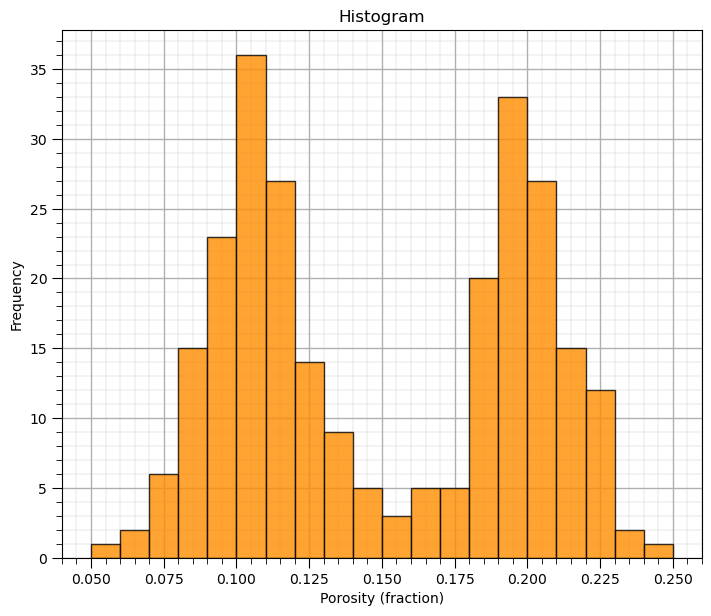

In [64]:
plt.hist(df['Porosity'].values,alpha=0.8,color="darkorange",edgecolor="black",bins=20,range=[pormin,pormax])
plt.title('Histogram'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Frequency"); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.1, hspace=0.2); plt.show()

Now we can demonstrate normalized histograms with matplotlib. 

* I didn't add this functionality to GeostatsPy's hist function

#### Normalized Histograms

Normalized histograms are convenient since we can read probability to be in each bin and observe closure by summing the probability for all bins is 1.0.

* to do this we need to explicitly set the weight for each data as $\frac{1}{n}$ (assuming equal weighting)

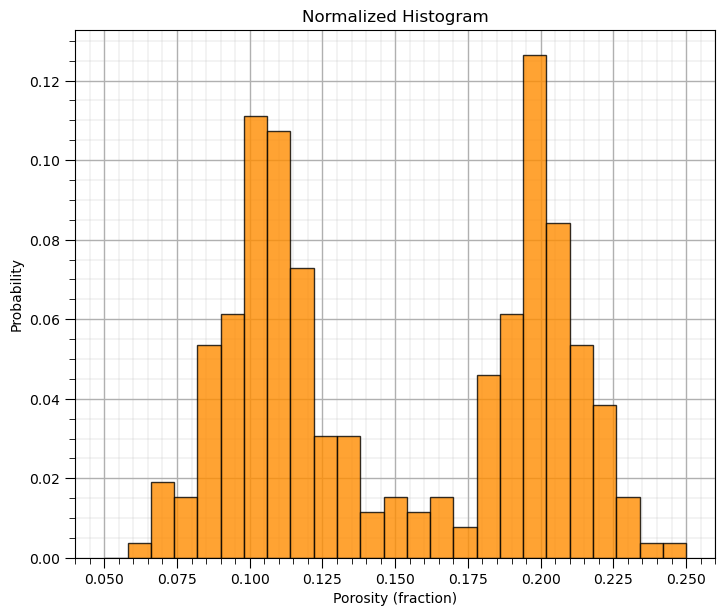

In [68]:
weights = np.ones(len(df)) / len(df)
plt.hist(df['Porosity'].values,alpha=0.8,color="darkorange",edgecolor="black",bins=25,range=[pormin,pormax],weights=weights)
plt.title('Normalized Histogram'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Probability"); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.1, hspace=0.2); plt.show()

#### Probability Density Functions

The practical way to calculate a probability density function (PDF) from data is to use of kernel density estimate (KDE).

* we place a kernel, in this case a parametric Gaussian PDF, at each data value and then calculate the sum of all data kernels.
* constrained for closure such that the area under the curve is 1.0.
* differentiating the data CDF is usually too noisy to be useful.

To demonstrate the KDE method, we calculate the KDE PDF for the first 2, 5, ..., 200 data. 

* when there are very few data you can see the individual Gaussian kernels
* with more data they start to smooth out

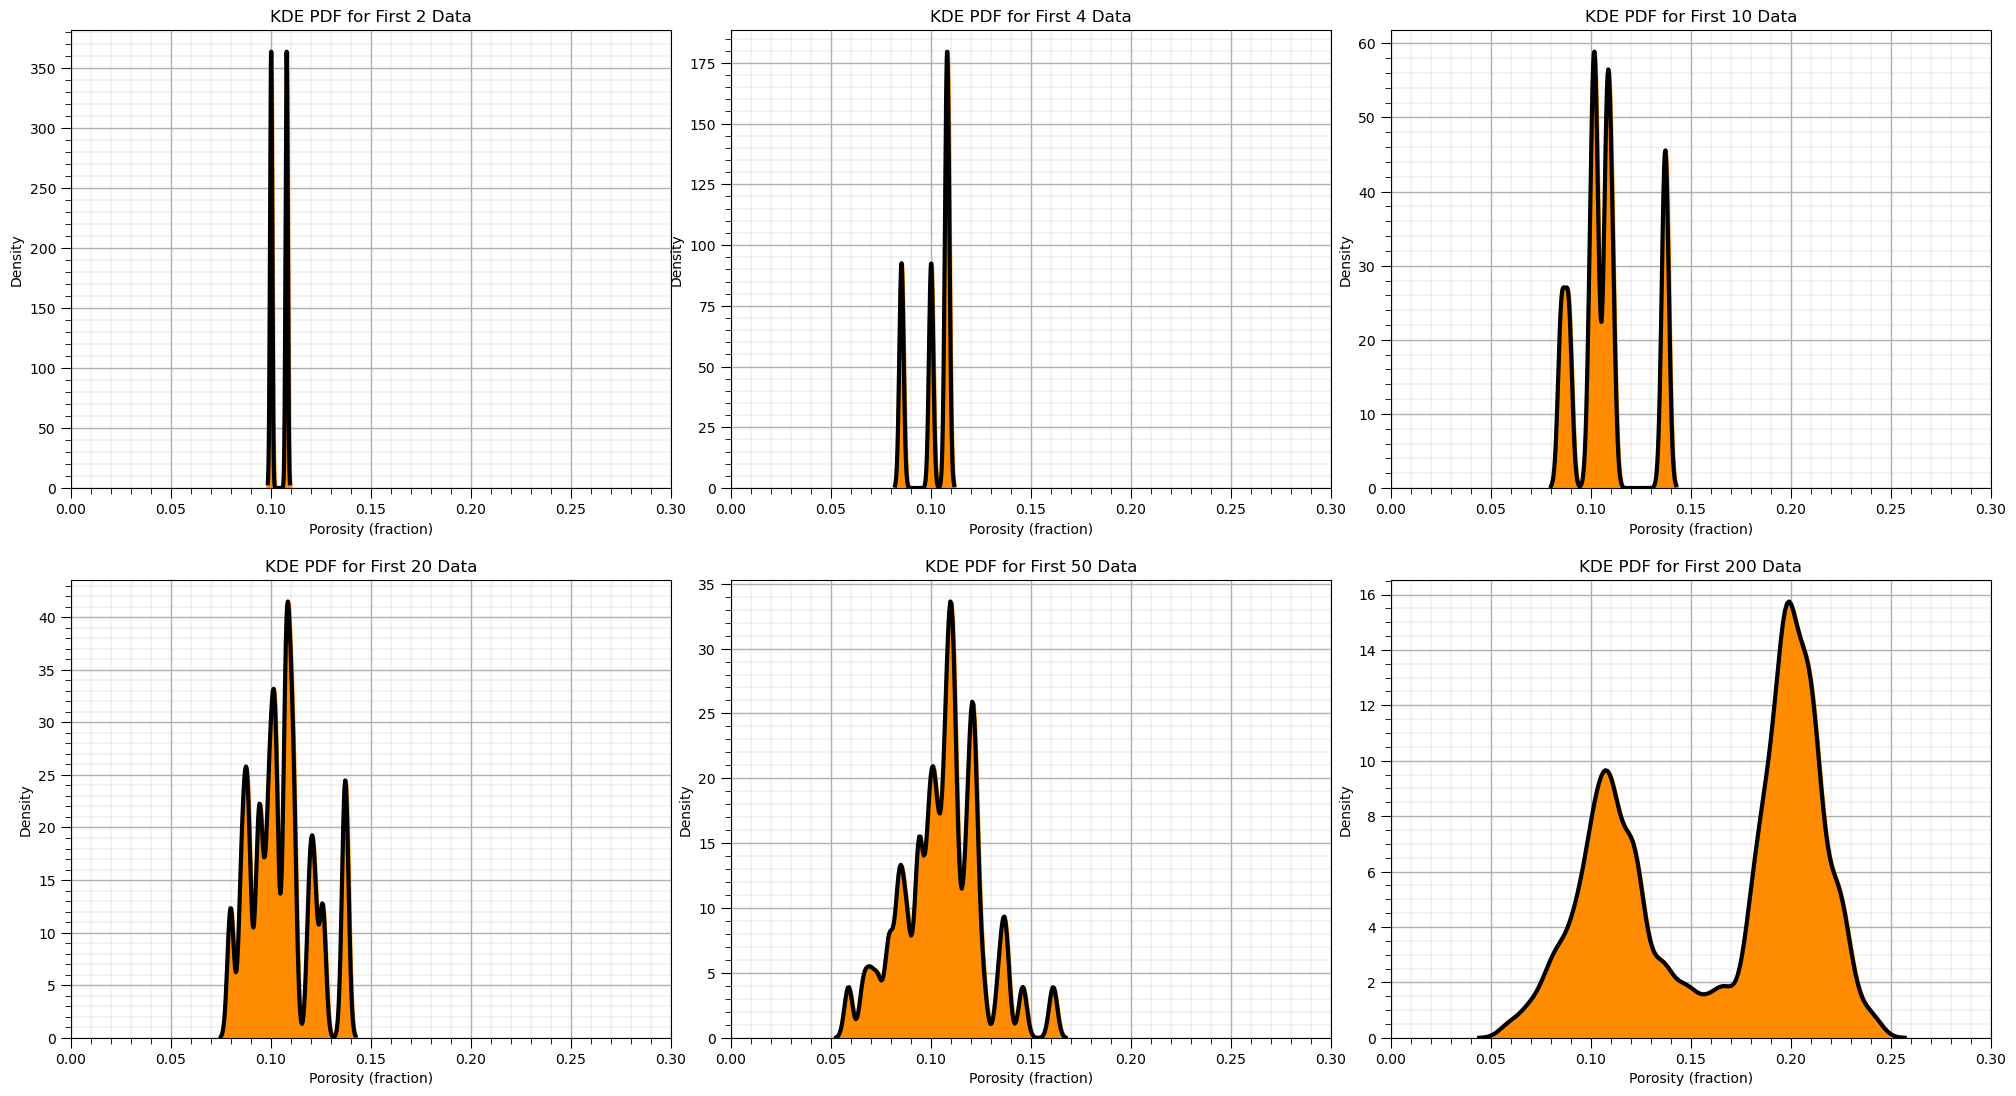

In [71]:
nums=[2,4,10,20,50,200]

for i, num in enumerate(nums):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df['Porosity'].values[:num],color = 'black',alpha = 1.0,linewidth=3,bw_method=0.1,fill=False,zorder=10)
    sns.kdeplot(x=df['Porosity'].values[:num],color = 'darkorange',alpha = 1.0,linewidth=3,bw_method=0.1,fill=True,zorder=1)
    plt.xlim([0,0.30]); add_grid()
    plt.title('KDE PDF for First ' + str(num) + ' Data'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.1, wspace=0.1, hspace=0.2); plt.show()

Now we can use the Seaborn Python package to calculate and plot the PDF from our data.

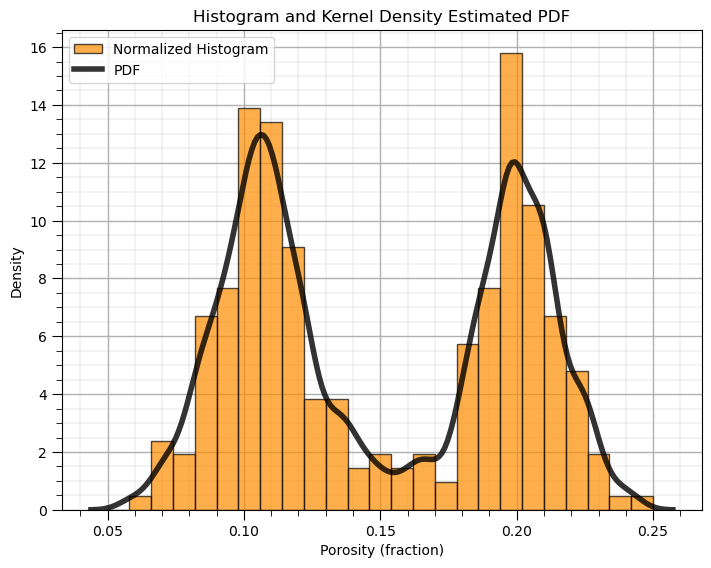

In [73]:
plt.hist(df['Porosity'].values,alpha=0.7,color="darkorange",edgecolor="black",bins=25,range=[pormin,pormax],density=True,
         label = 'Normalized Histogram')
sns.kdeplot(x=df['Porosity'].values,color = 'black',alpha = 0.8,linewidth=4.0,bw_method=0.10,label = 'PDF')
plt.title('Histogram and Kernel Density Estimated PDF'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")
plt.legend(loc='upper left'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2); plt.show()

What is the impact of changing the kernel width on the KDE PDF model? 

* let's loop over a variety of kernel sizes and observe the resulting PDF with the data histogram.
* note, kernel width is controlled by bandwidth, but the bandwidth parameter is poorly documented in Seaborn and seems to be related to original standard deviation. My hypothesis is the kernel standard deviation is the product of the bandwidth and the standard deviation of the feature.

Band Width = 0.01, bandwidth x standard deviation = 0.0004968730570602708
Band Width = 0.05, bandwidth x standard deviation = 0.0024843652853013543
Band Width = 0.1, bandwidth x standard deviation = 0.0049687305706027085
Band Width = 0.3, bandwidth x standard deviation = 0.014906191711808122


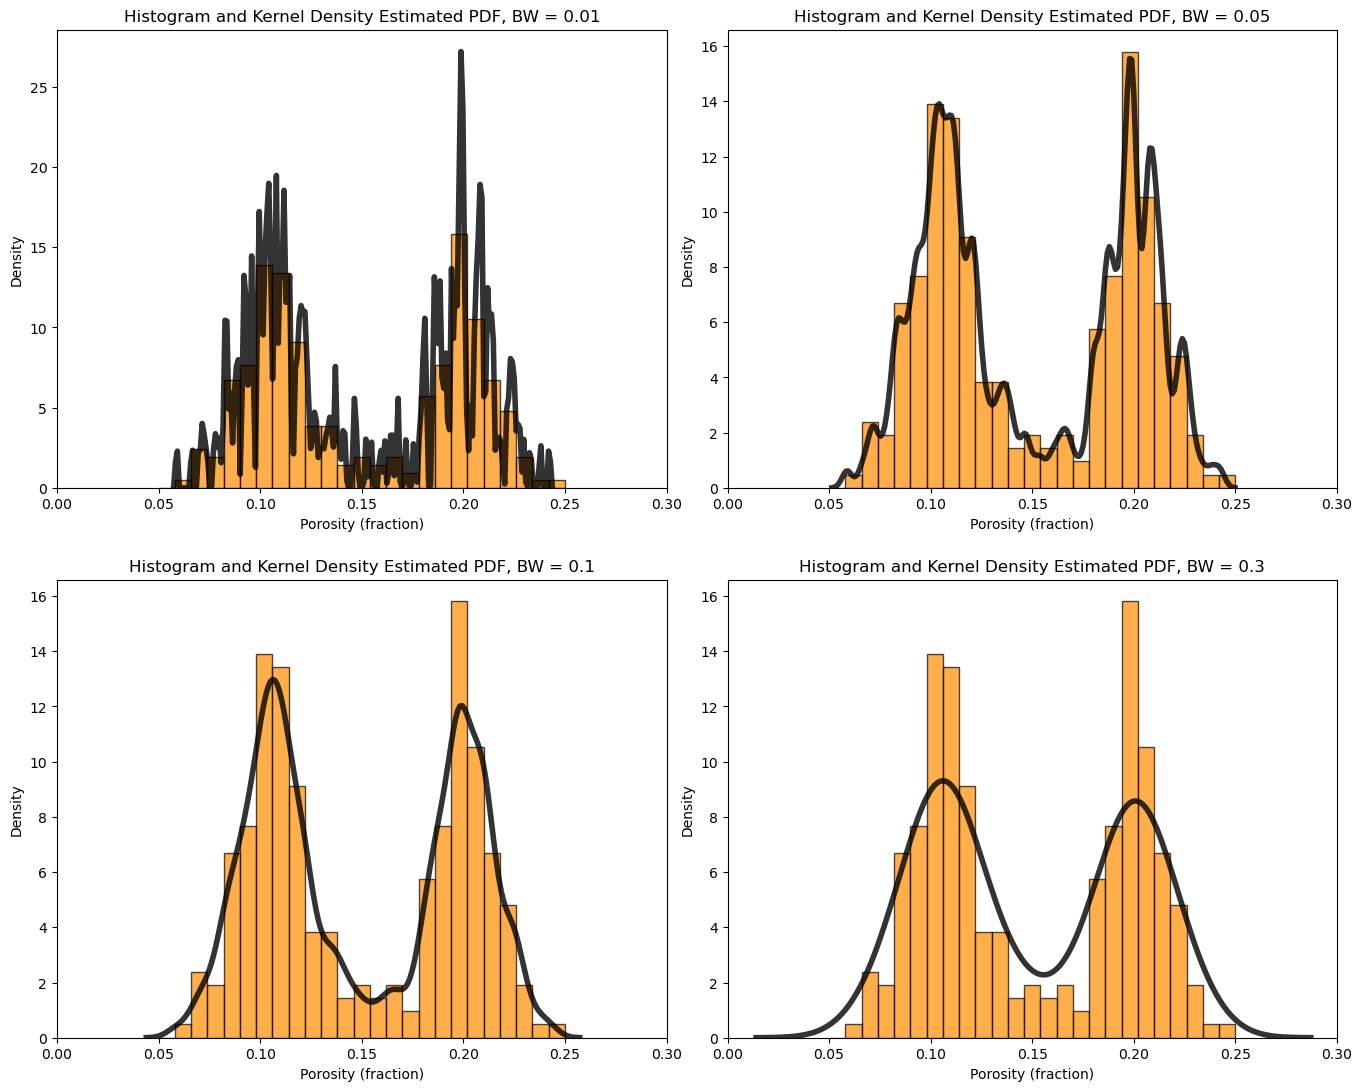

In [77]:
for i, bw in enumerate([0.01,0.05,0.1,0.3]):
    plt.subplot(2,2,i+1)
    print(r'Band Width = ' + str(bw) + r', bandwidth x standard deviation = ' + str(bw*np.std(df['Porosity'])) )
    plt.hist(df['Porosity'].values,alpha=0.7,color="darkorange",edgecolor="black",bins=25,range=[pormin,pormax],density=True)
    sns.kdeplot(x=df['Porosity'].values,color = 'black',alpha = 0.8,linewidth=4.0,bw_method=bw)
    plt.xlim([0.0,0.3])
    plt.title('Histogram and Kernel Density Estimated PDF, BW = ' + str(bw)); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.1, hspace=0.2); plt.show()

#### Cumulative Distribution Functions

This method in GeostatsPy makes a cumulative histogram. 

* you could increase or decrease the number of bins, $> n$ is data resolution 

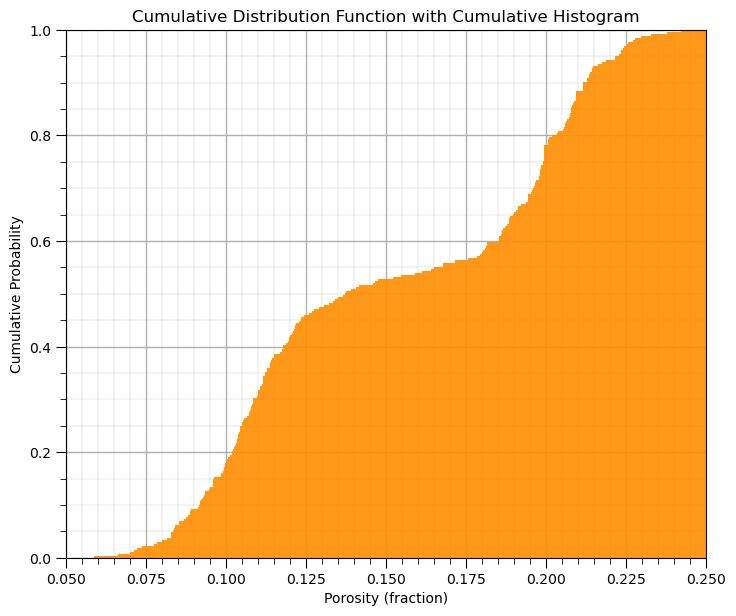

In [80]:
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = True,bins=1000,weights = None, # CDF with GeostatsPy
           xlabel='Porosity (fraction)',title='Cumulative Distribution Function with Cumulative Histogram'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.1, hspace=0.2); plt.show()

#### Plotting a CDF with the Matplotlib Package

Here's how we calculate and plot a CDF with matplotlib.  
* the y axis is cumulative probability with a minimum of 0.0 and maximum of 1.0 as expected for a CDF.
* note after the initial hist command we can add a variety of elements such as labels to our plot as shown below.

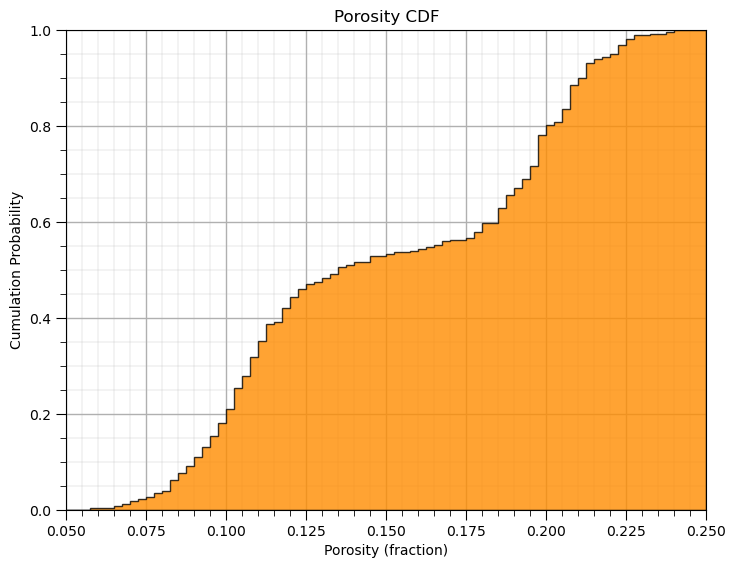

In [82]:
plt.hist(df['Porosity'].values,density=True, cumulative=True, label='CDF',
           histtype='stepfilled', alpha=0.8, bins = 100, color='darkorange', edgecolor = 'black', range=[0.0,0.25])
plt.xlabel('Porosity (fraction)'); plt.title('Porosity CDF'); plt.ylabel('Cumulation Probability'); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2); plt.xlim([pormin,pormax]); plt.ylim([0,1])
#plt.savefig('cdf_Porosity.tif',dpi=600,bbox_inches="tight")
plt.show()

#### Calculating and Plotting a CDF 'by- Hand'

Let's demonstrate the calculation and plotting of a non-parametric CDF by hand

1. make a copy of the feature as a 1D array (ndarray from NumPy)
2. sort the data in ascending order
3. assign cumulative probabilities based on the tail assumptions
4. plot cumulative probability vs. feature value

The ndarray has a shape of (261,).


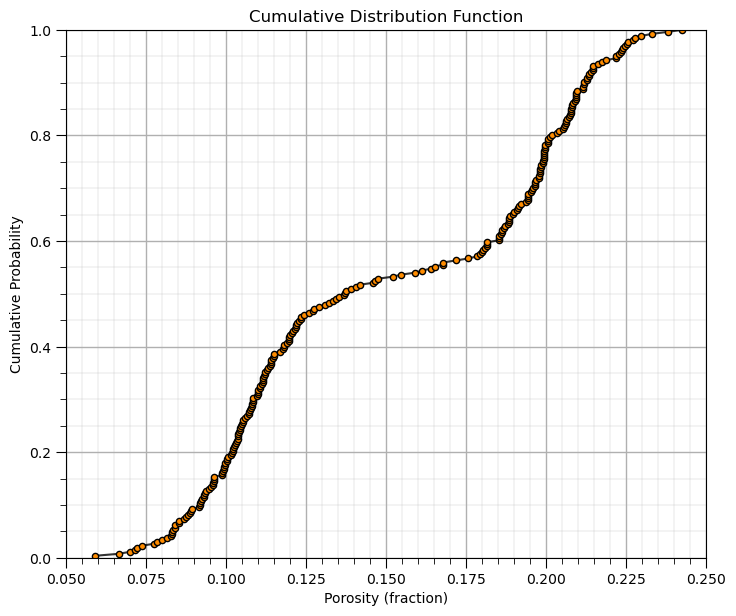

In [86]:
por = df['Porosity'].copy(deep = True).values                 # make a deep copy of the feature from the DataFrame
print('The ndarray has a shape of ' + str(por.shape) + '.')

por = np.sort(por)                                            # sort the data in ascending order
n = por.shape[0]                                              # get the number of data samples
cprob = np.zeros(n)
for i in range(0,n):
    index = i + 1
    cprob[i] = index / n                                      # known upper tail
    # cprob[i] = (index - 1)/n                                # known lower tail
    # cprob[i] = (index - 1)/(n - 1)                          # known upper and lower tails
    # cprob[i] = index/(n+1)                                  # unknown tails  

plt.subplot(111)
plt.plot(por,cprob, alpha = 0.8, c = 'black',zorder=1) # plot piecewise linear interpolation
plt.scatter(por,cprob,s = 20, alpha = 1.0, c = 'darkorange', edgecolor = 'black',zorder=2) # plot the CDF points
plt.xlim([pormin,pormax]); plt.ylim([0.0,1.0]); add_grid()
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Cumulative Distribution Function")

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.1, hspace=0.2); plt.show()

In conclusion, let's finish with the histograms of all of our features!

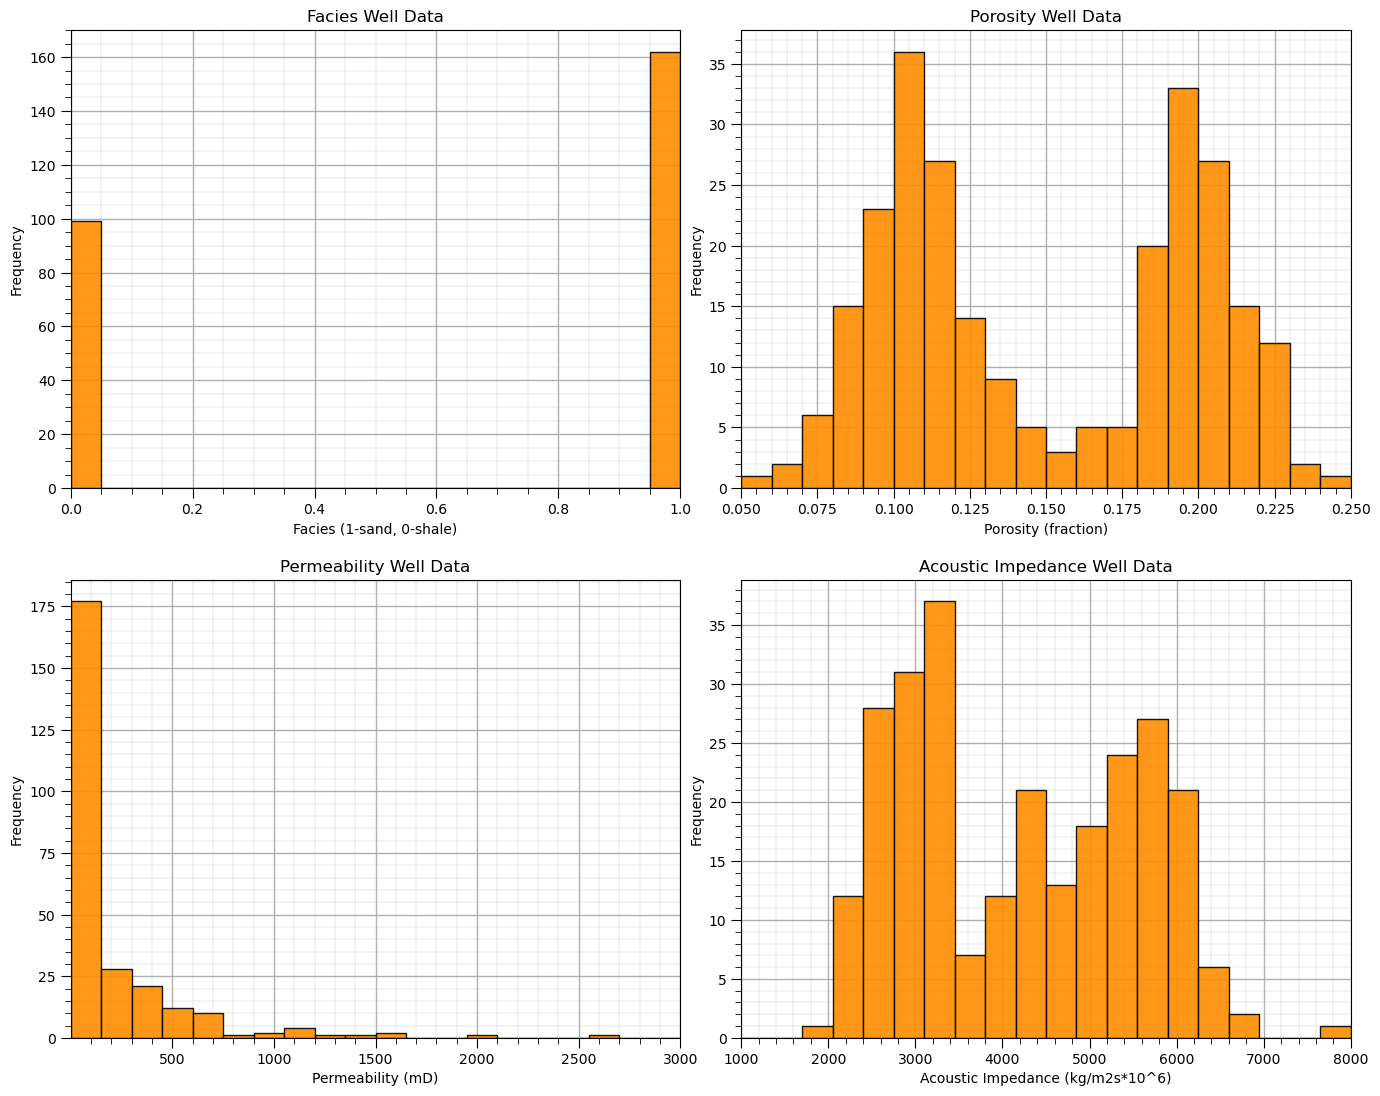

In [89]:
permmin = 0.01; permmax = 3000;                # user specified min and max
AImin = 1000.0; AImax = 8000
Fmin = 0; Fmax = 1

plt.subplot(221)
GSLIB.hist_st(df['Facies'].values,Fmin,Fmax,log=False,cumul = False,bins=20,weights = None,xlabel='Facies (1-sand, 0-shale)',
              title='Facies Well Data'); add_grid()

plt.subplot(222)
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=20,weights = None,xlabel='Porosity (fraction)',
              title='Porosity Well Data'); add_grid()

plt.subplot(223)
GSLIB.hist_st(df['Perm'].values,permmin,permmax,log=False,cumul = False,bins=20,weights = None,xlabel='Permeability (mD)',
              title='Permeability Well Data'); add_grid()

plt.subplot(224)
GSLIB.hist_st(df['AI'].values,AImin,AImax,log=False,cumul = False,bins=20,weights = None,xlabel='Acoustic Impedance (kg/m2s*10^6)',
              title='Acoustic Impedance Well Data'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.1, hspace=0.2)
#plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

#### Comments

This was a basic demonstration of calculating univariate statistics and visualizing data distributions. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources).

I hope this was helpful,

*Michael*

#### The Author:

Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
